# Sim1 with Full factorial

In [1]:
from typing import NamedTuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from doe_modules.design import DOE, FullFactorial
from doe_modules.preferences import kwarg_savefig, outputdir
from doe_modules.simulation import Sim1, MLR

In [2]:
class Config(NamedTuple):
    savefig: bool = True
    out: str = outputdir
    design: DOE = FullFactorial
    sim_name: str = r"Model $\Phi$"
    run_names: list = None
    preffix: str = "ff_"

conf = Config()

Text(0.5, 1.0, 'Model $\\Phi$')

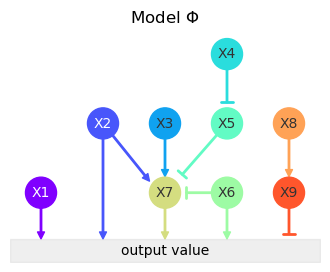

In [3]:
fig, ax = plt.subplots(figsize=(4, 3))

Sim1().plot(ax=ax)
ax.set_title(conf.sim_name)

# if conf.savefig:
#     fig.savefig(f"{conf.out}/sim_model", **kwarg_savefig)

In [4]:
# fig, ax = plt.subplots(4, 3, figsize=(12, 12))

model = Sim1()
model.simulate(
    design=conf.design, 
    # plot=True, ax=ax,
    # titles=conf.run_names
)

# fig.suptitle(f"{model.design().name} design", y=.93)

# if conf.savefig:
#     fig.savefig(f"{conf.out}/{conf.preffix}sim", **kwarg_savefig)

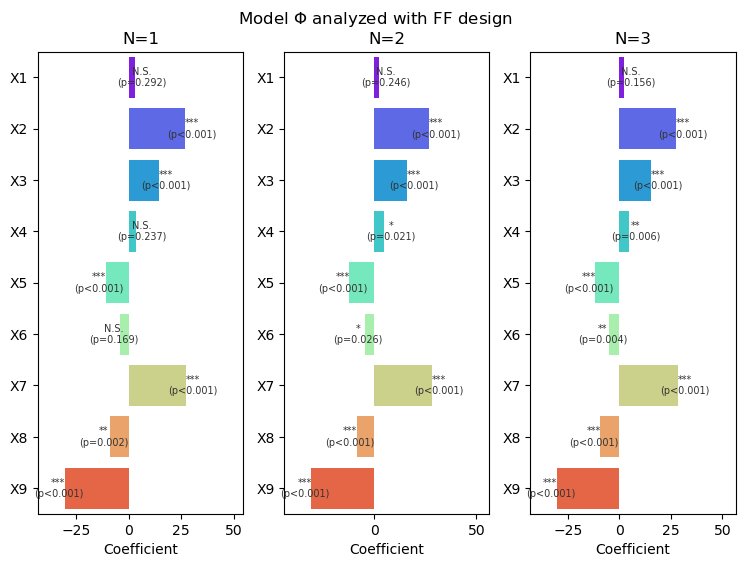

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(9, 6))

for i, a in enumerate(ax):
    model.simulate(n_rep=i + 1)
    mlr = MLR(model)
    mlr.plot(ax=a, anova=True, jitter_ratio=.05)

fig.suptitle(f"{conf.sim_name} analyzed with {model.metadata['design']} design", y=.95)

if conf.savefig:
    fig.savefig(f"{conf.out}/{conf.preffix}sim_mlr", **kwarg_savefig)

In [245]:
from doe_modules.preferences.cmap import sim1 as cmap

In [258]:
model = Sim1()
exmatrix = conf.design().get_exmatrix(n_factor=9)()
n_rep = 10

np.random.seed(0)
seeds = np.random.randint(0, 2**32, len(exmatrix) * n_rep)

expressions = []
output = []

for i, s in enumerate(seeds):
    model.run(exmatrix.iloc[i // n_rep, :], random_state=s)
    expressions += [list(model.x.values())]
    output += [[max(0, model.y)]]

In [290]:
from sklearn.linear_model import LinearRegression

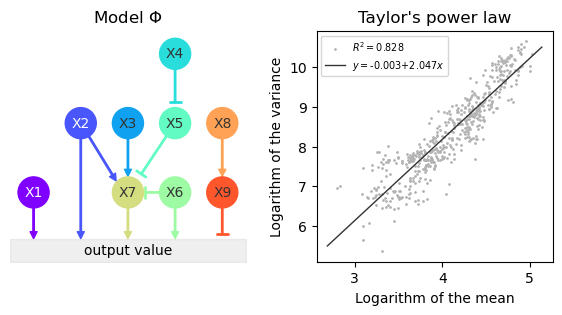

In [342]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3))
plt.subplots_adjust(wspace=0.3)

ym = np.array(output).reshape(10, -1).T.mean(axis=1)
yv = np.array(output).reshape(10, -1).T.var(axis=1)

lrm = LinearRegression()
lrm.fit(np.log(ym).reshape(-1, 1), np.log(yv))

Sim1().plot(ax=ax[0])
ax[0].set_title(conf.sim_name)
ax[-1].scatter(
    np.log(ym), np.log(yv), s=1, c=".7", 
    label=r"$R^2=$" + f"{lrm.score(np.log(ym).reshape(-1, 1), np.log(yv)).round(3)}"
)

xlim, ylim = ax[-1].get_xlim(), ax[-1].get_ylim()

ax[-1].plot(
    xlim, lrm.coef_ * np.array(xlim) + lrm.intercept_, 
    c=".2", lw=1, 
    label = "$y=$" + f"{lrm.intercept_.round(3)}" + "$+$" + f"{lrm.coef_.round(3).item()}" + "$x$"
)

ax[1].set(title="Taylor's power law", xlabel="Logarithm of the mean", ylabel="Logarithm of the variance")
ax[1].legend(fontsize="x-small")

# ax[2].set_xlim(np.min([xlim, ylim]), np.max([xlim, ylim]))
# ax[2].set_ylim(np.min([xlim, ylim]), np.max([xlim, ylim]))